In [109]:
!pip install opencv-python  --quiet

In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [111]:
# Take user input for image selection
image_number = input("Enter the image number (1, 2, or 3): ")

# Check the input and call the function accordingly
if image_number == '1':
    image = cv2.imread('gutters1.JPG')
elif image_number == '2':
    image = cv2.imread('gutters2.JPG')
elif image_number == '3':
    image = cv2.imread('gutters3.JPG')
else:
    print("Invalid input.")

Enter the image number (1, 2, or 3): 3


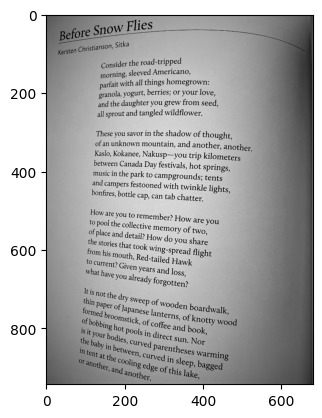

In [112]:

plt.imshow(image)

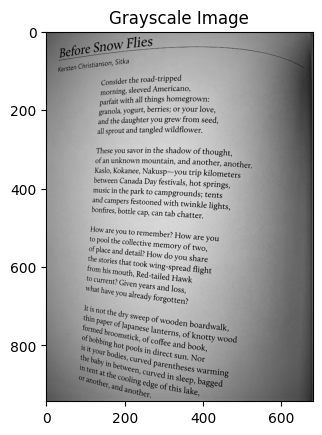

In [113]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()



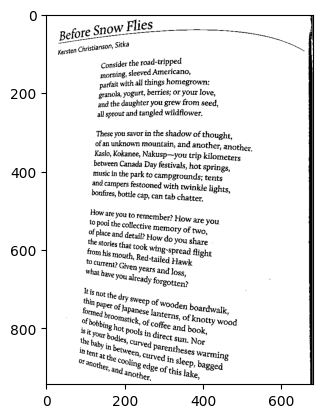

In [114]:
# Apply adaptive thresholding
threshold_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 20)
plt.imshow(threshold_image,cmap='gray')

In [115]:
def restore_color(original_image,thresholded_image):
  """Restores the color of a thresholded image."""

  # Resize the binary image to match the size of the grayscale image
  resized_binary = cv2.resize(thresholded_image, (original_image.shape[1], original_image.shape[0]))

  # Invert the resized binary image
  inverted_binary = cv2.bitwise_not(resized_binary)

  # Apply the inverted binary mask to the original image
  restored_image = cv2.bitwise_and(original_image, original_image, mask=inverted_binary)
  plt.imshow(restored_image, cmap='gray')

  # Combine the restored image with the binary image
  combined_image = cv2.bitwise_or(restored_image, inverted_binary)

  # Invert the resized binary image
  final_image = cv2.bitwise_not(combined_image)


  return final_image

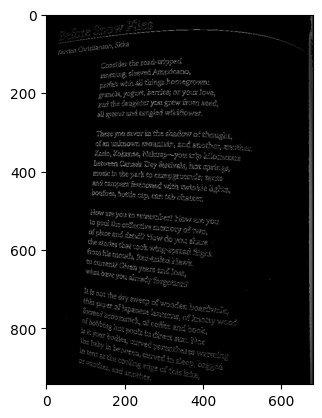

In [116]:

color_image = restore_color(gray_image,threshold_image)

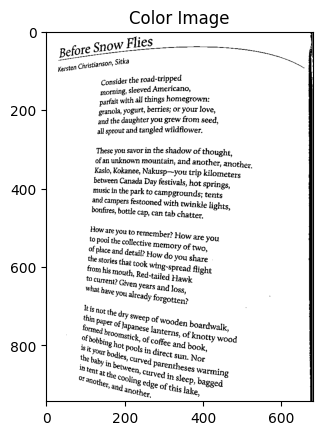

In [117]:
plt.imshow(color_image,cmap='gray')
plt.title('Color Image')
plt.show()